In [1]:
pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.3 MB/s eta 0:00:0000:01
  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/09/98/5a5fbfd48bf23acd3ceed5114d073b877965816304078151fefbf86d8458/ydata_profiling-4.5.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic<2,>=1.8.1 from https://files.pythonhosted.org/packages/bc/e0/0371e9b6c910afe502e5fe18cc94562bfd9399617c7b4f5b6e13c29115b3/pydantic-1.10.12-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.9 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for wordcloud>=1.9.1 from 

In [2]:
pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 13.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [5]:
##library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

# SMOTE (Synthetic Minority Over-sampling Technique): SMOTE generates synthetic samples for the minority class by interpolating between existing samples. It creates new instances by selecting a pair of similar instances and introducing synthetic samples along the line connecting them. SMOTE helps prevent overfitting compared to random oversampling.

# Data Loading

In [6]:
acc = pd.read_csv("Customer_account_info.csv")
churn = pd.read_csv("Customer_Churn.csv")
demo  = pd.read_csv("Customer_demographics.csv")
serv  = pd.read_csv("Customer_services.csv")

In [7]:
df = pd.concat([acc,demo,serv,churn],axis=1, join="inner")
# df=pd.merge([acc,churn,demo,serv], on=acc.customerID, how="outer")

In [8]:
df.head()

,Unnamed: 0,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Unnamed: 0,customerID,...,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,customerID,Churn
0,0,CUST_ID001,42.0,Month-to-month,Yes,Electronic check,79.854582,1059.55,0,CUST_ID001,...,No phone service,Fiber optic,No,No,No,No,No,No,CUST_ID001,Yes
1,1,CUST_ID002,32.0,Month-to-month,Yes,Electronic check,76.845120,669.45,1,CUST_ID002,...,No,Fiber optic,No internet service,Yes,Yes,Yes,No internet service,Yes,CUST_ID002,No
2,2,CUST_ID003,0.0,Month-to-month,No,Electronic check,55.614150,3791.6,2,CUST_ID003,...,No,DSL,Yes,Yes,No,No,No,Yes,CUST_ID003,No
3,3,CUST_ID004,72.0,Two year,Yes,Credit card (automatic),108.491169,6470.1,3,CUST_ID004,...,Yes,Fiber optic,No,Yes,No internet service,Yes,Yes,Yes,CUST_ID004,No
4,4,CUST_ID005,38.0,Month-to-month,Yes,Bank transfer (automatic),NaN,1496.9,4,CUST_ID005,...,Yes,Fiber optic,No,No,No,No,No,No,CUST_ID005,No


In [9]:
df2 = df.T.drop_duplicates().T

In [10]:
df2.columns

Index(['Unnamed: 0', 'customerID', 'tenure', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Churn'],
      dtype='object')

In [11]:
df2.head()

,Unnamed: 0,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,CUST_ID001,42.0,Month-to-month,Yes,Electronic check,79.854582,1059.55,Male,0.0,...,Yes,No phone service,Fiber optic,No,No,No,No,No,No,Yes
1,1,CUST_ID002,32.0,Month-to-month,Yes,Electronic check,76.84512,669.45,Female,0.0,...,Yes,No,Fiber optic,No internet service,Yes,Yes,Yes,No internet service,Yes,No
2,2,CUST_ID003,0.0,Month-to-month,No,Electronic check,55.61415,3791.6,Female,0.0,...,Yes,No,DSL,Yes,Yes,No,No,No,Yes,No
3,3,CUST_ID004,72.0,Two year,Yes,Credit card (automatic),108.491169,6470.1,Female,1.0,...,Yes,Yes,Fiber optic,No,Yes,No internet service,Yes,Yes,Yes,No
4,4,CUST_ID005,38.0,Month-to-month,Yes,Bank transfer (automatic),NaN,1496.9,Male,1.0,...,Yes,Yes,Fiber optic,No,No,No,No,No,No,No


In [12]:
df2.isna().sum()

Unnamed: 0           0
customerID           0
tenure              16
Contract             7
PaperlessBilling    33
PaymentMethod       49
MonthlyCharges      13
TotalCharges        10
gender               5
SeniorCitizen       42
Partner              0
Dependents           0
PhoneService        12
MultipleLines        0
InternetService      0
OnlineSecurity      37
OnlineBackup         0
DeviceProtection     0
TechSupport         35
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64

In [13]:
#Profile report
prof = ProfileReport(df2)
prof.to_file(output_file='churn_report.html')

In [14]:
df2.describe()

,Unnamed: 0,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
count,34413,34413,34397.0,34406,34380,34364,34400.00,34403,34408,34371.0,...,34401,34413,34413,34376,34413,34413,34378,34413,34413,34413
unique,34413,34413,73.0,3,2,4,31031.00,6368,2,2.0,...,2,3,3,3,3,3,3,3,3,2
top,0,CUST_ID001,0.0,Month-to-month,Yes,Mailed check,18.25,20.2,Male,0.0,...,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,No
freq,1,1,3311.0,19693,21982,10643,2145.00,1470,17490,28210.0,...,33520,16150,15006,16890,15080,15037,16860,16832,17138,28622


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34413 entries, 0 to 34412
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        34413 non-null  object
 1   tenure            34397 non-null  object
 2   Contract          34406 non-null  object
 3   PaperlessBilling  34380 non-null  object
 4   PaymentMethod     34364 non-null  object
 5   MonthlyCharges    34400 non-null  object
 6   TotalCharges      34403 non-null  object
 7   gender            34408 non-null  object
 8   SeniorCitizen     34371 non-null  object
 9   Partner           34413 non-null  object
 10  Dependents        34413 non-null  object
 11  PhoneService      34401 non-null  object
 12  MultipleLines     34413 non-null  object
 13  InternetService   34413 non-null  object
 14  OnlineSecurity    34376 non-null  object
 15  OnlineBackup      34413 non-null  object
 16  DeviceProtection  34413 non-null  object
 17  TechSupport 

In [15]:
# Changing the data tyoe of "TotalCharges" and "tenure" to float.
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')

def feature_to_float(feature_list, df2):
    for i in feature_list:
        df2[i] = df2[i].astype(float)
    return df2

feature_to_float(['tenure'], df2)


,Unnamed: 0,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,CUST_ID001,42.0,Month-to-month,Yes,Electronic check,79.854582,1059.55,Male,0.0,...,Yes,No phone service,Fiber optic,No,No,No,No,No,No,Yes
1,1,CUST_ID002,32.0,Month-to-month,Yes,Electronic check,76.84512,669.45,Female,0.0,...,Yes,No,Fiber optic,No internet service,Yes,Yes,Yes,No internet service,Yes,No
2,2,CUST_ID003,0.0,Month-to-month,No,Electronic check,55.61415,3791.60,Female,0.0,...,Yes,No,DSL,Yes,Yes,No,No,No,Yes,No
3,3,CUST_ID004,72.0,Two year,Yes,Credit card (automatic),108.491169,6470.10,Female,1.0,...,Yes,Yes,Fiber optic,No,Yes,No internet service,Yes,Yes,Yes,No
4,4,CUST_ID005,38.0,Month-to-month,Yes,Bank transfer (automatic),NaN,1496.90,Male,1.0,...,Yes,Yes,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34408,34408,CUST_ID34409,61.0,Two year,Yes,Bank transfer (automatic),49.341082,994.80,Male,1.0,...,Yes,Yes,No,No internet service,No internet service,No internet service,Yes,No internet service,No internet service,No
34409,34409,CUST_ID34410,31.0,Two year,No,Electronic check,48.745809,5991.05,Female,1.0,...,Yes,No,DSL,Yes,No,No,No internet service,No,Yes,No
34410,34410,CUST_ID34411,61.0,One year,Yes,Credit card (automatic),20.094633,57.50,Male,0.0,...,Yes,No,DSL,No internet service,Yes,Yes,No internet service,No,Yes,No
34411,34411,CUST_ID34412,0.0,Month-to-month,Yes,Mailed check,70.174167,2409.90,Male,1.0,...,No,No,Fiber optic,No,No,No,No,No,No,Yes


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34413 entries, 0 to 34412
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        34413 non-null  object 
 1   customerID        34413 non-null  object 
 2   tenure            34397 non-null  float64
 3   Contract          34406 non-null  object 
 4   PaperlessBilling  34380 non-null  object 
 5   PaymentMethod     34364 non-null  object 
 6   MonthlyCharges    34400 non-null  object 
 7   TotalCharges      34391 non-null  float64
 8   gender            34408 non-null  object 
 9   SeniorCitizen     34371 non-null  object 
 10  Partner           34413 non-null  object 
 11  Dependents        34413 non-null  object 
 12  PhoneService      34401 non-null  object 
 13  MultipleLines     34413 non-null  object 
 14  InternetService   34413 non-null  object 
 15  OnlineSecurity    34376 non-null  object 
 16  OnlineBackup      34413 non-null  object

In [17]:
df2['tenure'] = df2['tenure'].fillna(df2['tenure'].mean())

In [18]:
df2['Contract'] = df2['Contract'].fillna(df2['Contract'].mode()[0])
df2['PaperlessBilling'] = df2['PaperlessBilling'].fillna(df2['PaperlessBilling'].mode()[0])
df2['PaymentMethod'] = df2['PaymentMethod'].fillna(df2['PaymentMethod'].mode()[0])
df2['gender'] = df2['gender'].fillna(df2['gender'].mode()[0])
df2['SeniorCitizen'] = df2['SeniorCitizen'].fillna(df2['SeniorCitizen'].mode()[0])
df2['PhoneService'] = df2['PhoneService'].fillna(df2['PhoneService'].mode()[0])
df2['OnlineSecurity'] = df2['OnlineSecurity'].fillna(df2['OnlineSecurity'].mode()[0])
df2['TechSupport'] = df2['TechSupport'].fillna(df2['TechSupport'].mode()[0])
df2['MonthlyCharges'] = df2['MonthlyCharges'].fillna(df2['MonthlyCharges'].mean())
df2['TotalCharges'] = df2['TotalCharges'].fillna(df2['TotalCharges'].mean())

In [19]:
df2.isnull().sum()

Unnamed: 0          0
customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64

In [20]:
def feature_to_int(feature_list, df2):
    for i in feature_list:
        df2[i] = df2[i].astype(int)
    return df2

feature_to_int(['SeniorCitizen'], df2)

,Unnamed: 0,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,CUST_ID001,42.0,Month-to-month,Yes,Electronic check,79.854582,1059.55,Male,0,...,Yes,No phone service,Fiber optic,No,No,No,No,No,No,Yes
1,1,CUST_ID002,32.0,Month-to-month,Yes,Electronic check,76.845120,669.45,Female,0,...,Yes,No,Fiber optic,No internet service,Yes,Yes,Yes,No internet service,Yes,No
2,2,CUST_ID003,0.0,Month-to-month,No,Electronic check,55.614150,3791.60,Female,0,...,Yes,No,DSL,Yes,Yes,No,No,No,Yes,No
3,3,CUST_ID004,72.0,Two year,Yes,Credit card (automatic),108.491169,6470.10,Female,1,...,Yes,Yes,Fiber optic,No,Yes,No internet service,Yes,Yes,Yes,No
4,4,CUST_ID005,38.0,Month-to-month,Yes,Bank transfer (automatic),65.049760,1496.90,Male,1,...,Yes,Yes,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34408,34408,CUST_ID34409,61.0,Two year,Yes,Bank transfer (automatic),49.341082,994.80,Male,1,...,Yes,Yes,No,No internet service,No internet service,No internet service,Yes,No internet service,No internet service,No
34409,34409,CUST_ID34410,31.0,Two year,No,Electronic check,48.745809,5991.05,Female,1,...,Yes,No,DSL,Yes,No,No,No internet service,No,Yes,No
34410,34410,CUST_ID34411,61.0,One year,Yes,Credit card (automatic),20.094633,57.50,Male,0,...,Yes,No,DSL,No internet service,Yes,Yes,No internet service,No,Yes,No
34411,34411,CUST_ID34412,0.0,Month-to-month,Yes,Mailed check,70.174167,2409.90,Male,1,...,No,No,Fiber optic,No,No,No,No,No,No,Yes


In [21]:
# Looping through the columns to get unique values per column.
for i in df2.columns:
    print(f"Unique {i}'s count: {df2[i].nunique()}")
    print(f"{df2[i].unique()}\n")

Unique Unnamed: 0's count: 34413
[0 1 2 ... 34410 34411 34412]

Unique customerID's count: 34413
['CUST_ID001' 'CUST_ID002' 'CUST_ID003' ... 'CUST_ID34411' 'CUST_ID34412'
 'CUST_ID34413']

Unique tenure's count: 74
[42.         32.          0.         72.         38.          5.
  4.         24.         18.         41.          2.         11.
 54.         37.         35.          9.         20.         22.
 31.         21.         52.         44.         46.         49.
  8.         45.         17.         51.         71.         60.
 29.         59.         25.         26.         66.         58.
 19.         61.         63.         30.         23.          6.
 36.         34.          3.         13.         64.         15.
 50.         28.         40.         47.         33.         43.
 16.         10.          7.         55.         14.         53.
 65.         68.         57.         12.         27.          1.
 62.         48.         56.         39.         67.         69.
 70. 

In [22]:
# Renaming the data values of "PaymentMethod" for better readability.
payment_column = {'Electronic check': 'E-Check' , 'Mailed check': 'Mailed Check', 'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}
df2["PaymentMethod"].replace(payment_column, inplace=True)

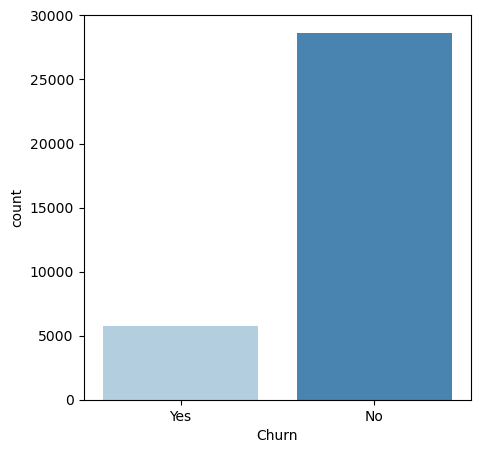

In [19]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df2['Churn'], palette="Blues", linewidth=1)
plt.show()

In [20]:
# Create a function to generate boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df2):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df2[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()

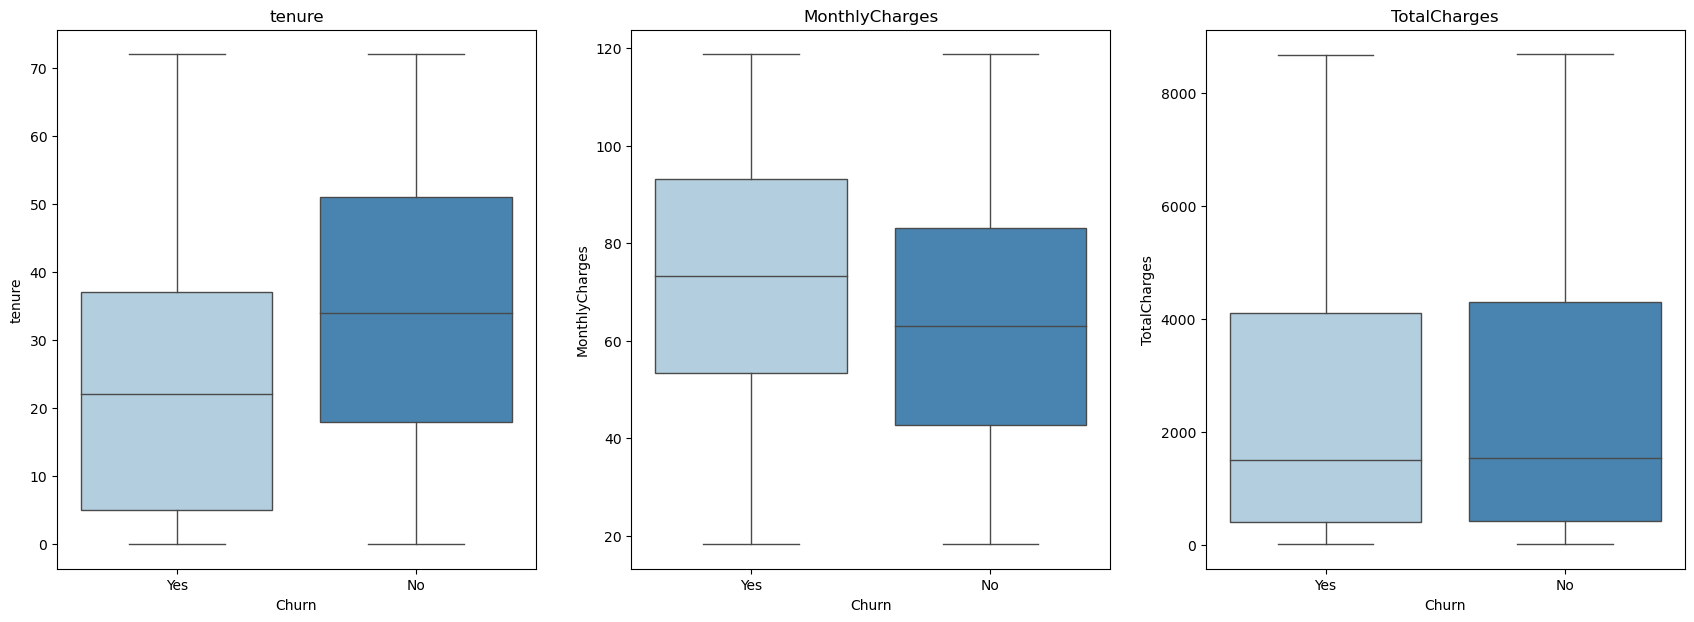

In [21]:
# Generate boxplots for tenure, MonthlyCharges and TotalCharges.
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df2)

No Outliers detected

In [23]:
# Generate new feature "Number_AdditionalServices" by summing up the number of add-on services consumed.
df2['Number_AdditionalServices'] = (df2[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

In [24]:
# Drop customerID feature.
df2 = df2.drop(columns='customerID')

In [25]:
# Label encoding for identified columns.
features_le = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features, df2):
    for i in features:
        df2[i] = df2[i].map({'Yes': 1, 'No': 0})
    return       

label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df2)

df2['gender'] = df2['gender'].map({'Female': 1, 'Male': 0})

In [26]:
# One-Hot-Encoding for identified columns.
features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

df2 = pd.get_dummies(df2, columns=features_ohe) 

In [27]:
# Min-Max-Scaling for identified columns.
from sklearn.preprocessing import MinMaxScaler

features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_features_mms = pd.DataFrame(df2, columns=features_mms)
df_remaining_features = df2.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

df2 = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

In [28]:
#Using pearson correlation to idendtify dependency astarget varible is binary
corr_matrix = df2.corr(method = 'pearson')
df_importance = corr_matrix['Churn'].sort_values(ascending=False)
new_df_imp = df_importance.to_frame()
new_df_imp

,Churn
Churn,1.000000
Contract_Month-to-month,0.176771
InternetService_Fiber optic,0.157747
TechSupport_No,0.156603
OnlineSecurity_No,0.155917
DeviceProtection_No,0.136254
OnlineBackup_No,0.132932
PaymentMethod_E-Check,0.126434
MonthlyCharges,0.125227
Number_AdditionalServices_0,0.096289


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34413 entries, 0 to 34412
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            34413 non-null  object 
 1   PaperlessBilling                      34413 non-null  int64  
 2   gender                                34413 non-null  int64  
 3   SeniorCitizen                         34413 non-null  int64  
 4   Partner                               34413 non-null  int64  
 5   Dependents                            34413 non-null  int64  
 6   PhoneService                          34413 non-null  int64  
 7   Churn                                 34413 non-null  int64  
 8   MultipleLines_No                      34413 non-null  bool   
 9   MultipleLines_No phone service        34413 non-null  bool   
 10  MultipleLines_Yes                     34413 non-null  bool   
 11  InternetService

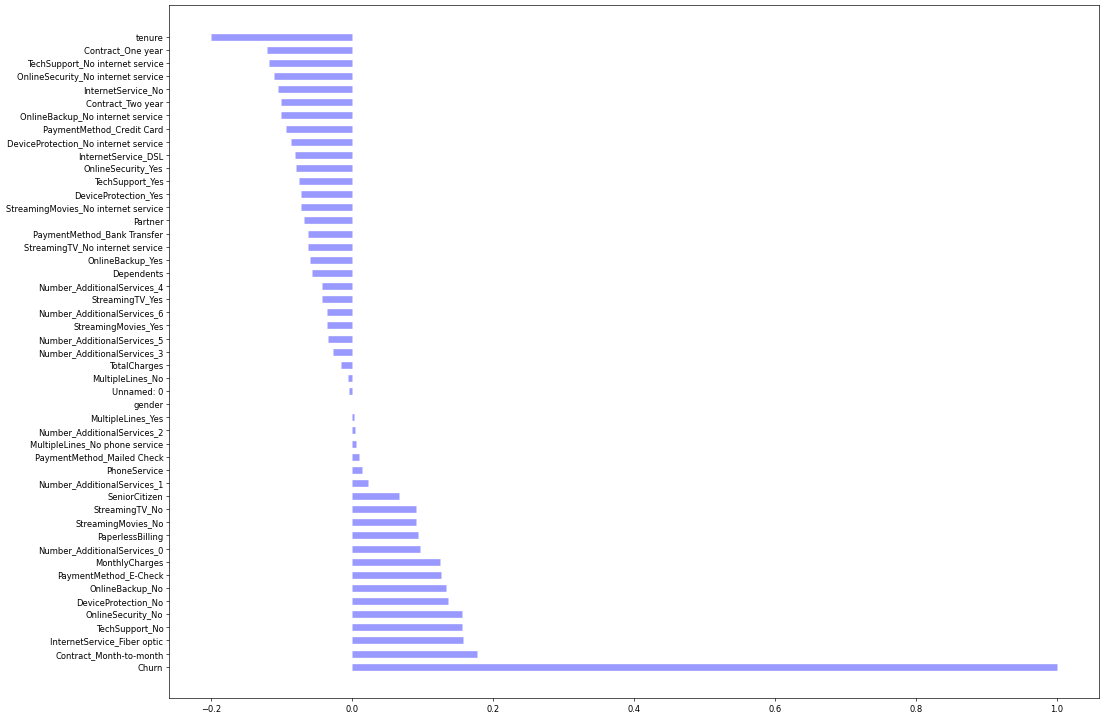

In [30]:
# Draw plot
plt.figure(figsize=(20,15), dpi=60)
  
# Plotting the horizontal lines
plt.hlines(y=new_df_imp.index, xmin=0, xmax=new_df_imp.Churn,
           alpha=0.4, linewidth=8,colors = 'b')

In [32]:
#churn is target varible here. 
df2.groupby('Churn').size()

Churn
0    28622
1     5791
dtype: int64

In [33]:
col_numeric = ['PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank Transfer',
       'PaymentMethod_Credit Card', 'PaymentMethod_E-Check',
       'PaymentMethod_Mailed Check', 'Number_AdditionalServices_0',
       'Number_AdditionalServices_1', 'Number_AdditionalServices_2',
       'Number_AdditionalServices_3', 'Number_AdditionalServices_4',
       'Number_AdditionalServices_5', 'Number_AdditionalServices_6', 'tenure',
       'MonthlyCharges', 'TotalCharges']

In [34]:
df2.columns

Index(['Unnamed: 0', 'PaperlessBilling', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank Transfer',
       'PaymentMethod_Credit Card', 'PaymentMethod_E-Check',
       '

# Getting X and y from the Data and Using SMOTE for oversampling

In [35]:
X = df2.drop(["Churn"],axis=1)
y = df2["Churn"]

In [36]:
smote = SMOTE(random_state=42)  # You can adjust the random_state parameter for reproducibility
X_resampled, y_resampled = smote.fit_resample(X, y)

In [37]:
X_resampled.shape

(57244, 48)

In [38]:
y_resampled.value_counts()

Churn
1    28622
0    28622
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_tr , X_val , y_tr , y_val = train_test_split(X,y,test_size=0.2)
X_train , X_test , y_train , y_test = train_test_split(X_tr,y_tr,test_size=0.2)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

# Train Test Split

In [32]:
##Split train test data
df_data = df2.sample(n = len(df2), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [33]:
df_valid_test = df_data.sample(frac = 0.30,random_state = 42)

In [34]:
df_test = df_valid_test.sample(frac = 0.50,random_state=42)
df_valid = df_valid_test.drop(df_test.index)

In [35]:
df_train_all = df_data.drop(df_valid_test.index)

In [36]:
#check if new dfs are balanced or not
print('test distribution:',(df_test.groupby('Churn').size()))
print('valid distribution:',(df_valid.groupby('Churn').size()))
print('train distribution:',(df_train_all.groupby('Churn').size()))

test distribution: Churn
0    4271
1     891
dtype: int64
valid distribution: Churn
0    4318
1     844
dtype: int64
train distribution: Churn
0    20033
1     4056
dtype: int64


In [37]:
#ABove stats confirms that its imbalance dataset. 
#split train data into positive and negatives
rows_pos = df_train_all.Churn == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

#merge balance data
df_train = pd.concat([df_train_pos,df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

#shuffle samples
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_train.groupby('Churn').size()))

train distribution: Churn
0    4056
1    4056
dtype: int64


In [38]:
#split valid data into positive and negatives
rows_pos = df_valid.Churn == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

#merge balance data
df_valid = pd.concat([df_valid_pos,df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

#shuffle samples
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_valid.groupby('Churn').size()))

train distribution: Churn
0    844
1    844
dtype: int64


In [39]:
#split test data into positive and negatives
rows_pos = df_test.Churn == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

#merge balance data
df_test = pd.concat([df_test_pos,df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

#shuffle samples
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop= True)

print('train distribution:',(df_valid.groupby('Churn').size()))

train distribution: Churn
0    844
1    844
dtype: int64


In [44]:
##create x and y matrics for input to ML packages(isolating target varible)
X_train = df_train[col_numeric].values
X_train_all = df_train_all[col_numeric].values
X_valid = df_valid[col_numeric].values

y_train = df_train['Churn'].values
y_valid = df_valid['Churn'].values

print('training all shape:',X_train_all.shape)
print('train shape:',X_train.shape,y_train.shape)
print('valid shape:',X_valid.shape,y_valid.shape)

training all shape: (24089, 48)
train shape: (8112, 48) (8112,)
valid shape: (1688, 48) (1688,)


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scalar = StandardScaler()
scalar.fit(X_train_all)

StandardScaler()

In [47]:
X_train_tf = scalar.transform(X_train)
X_valid_tf = scalar.transform(X_valid)

In [51]:
import time 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve ,auc

In [68]:
# Define a hyperparameter grid for grid search
logistic_regression = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type (L1 or L2)
    'C': np.logspace(-4, 4, 9),  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Solver for logistic regression
}

# Create a grid search object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model) from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

In [69]:
lr = LogisticRegression(solver='liblinear',random_state=42)
t1 = time.time()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_val)
t2 = time.time()
ts1 = accuracy_score(y_val, pred1)*100  #test accuracy
trn1 = accuracy_score(y_train, lr.predict(X_train))*100  #train accuracy
cmdt = confusion_matrix(y_val, pred1)  
Sen1 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc1 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr1 = 1-Sen1
print('\nLR model \n\nClassification report for test data:\n\n',classification_report(y_val, pred1))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


LR model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.84      1.00      0.91      5735
           1       0.56      0.03      0.06      1148

    accuracy                           0.83      6883
   macro avg       0.70      0.51      0.48      6883
weighted avg       0.79      0.83      0.77      6883


Confusion matrix for test data:
 [[5707   28]
 [1112   36]]

Sensitivity :  0.5625
Specificity :  0.8369262355184045

Execution time for Model: 0.375935 seconds


In [70]:
y_pred_2 = lr.predict(X_test)
accuracy_score(y_pred_2,y_test)

0.8414456956047948

True Neg:5707
False Pos:28
False Neg:1112
True Pos:36


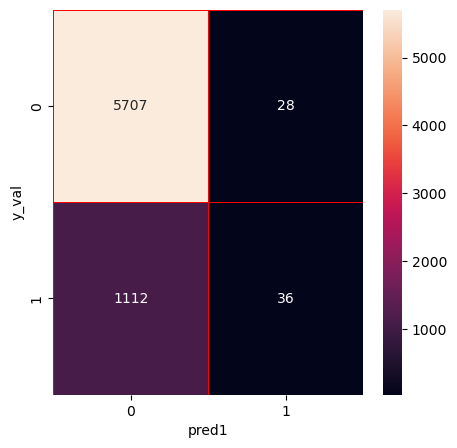

In [71]:
tn,fp,fn,tp = confusion_matrix(y_val,pred1).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred1")
plt.ylabel("y_val")
plt.show()

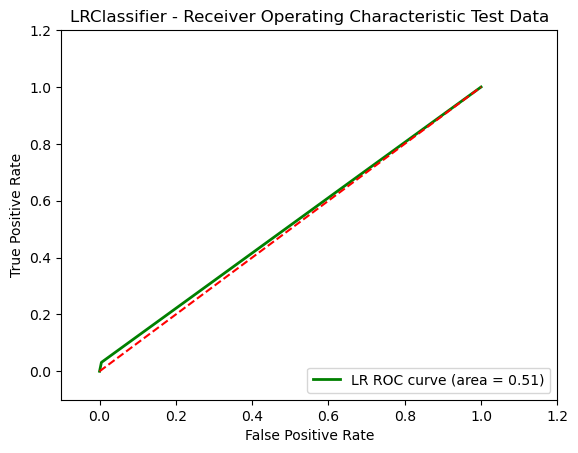

In [72]:
#roc curve
fpr1,tpr1,thres1 = roc_curve(y_val, pred1)   
roc_auc1 = auc(fpr1, tpr1)   
plt.title('LRClassifier - Receiver Operating Characteristic Test Data') 
plt.plot(fpr1, tpr1, color ='green', lw = 2, label='LR ROC curve (area = %0.2f)' % roc_auc1) 
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# K Nearest Neighbors

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
t1 = time.time()
knn_cv.fit(X_train,y_train)
pred2 = knn_cv.predict(X_val)
t2 = time.time()
ts2 = accuracy_score(y_val, pred1)*100  #test accuracy
trn2 = accuracy_score(y_train, knn_cv.predict(X_train))*100  #train accuracy
cmdt = confusion_matrix(y_val, pred2)  
Sen2 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc2 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr2 = 1-Sen2
print('\nKNN model \n\nClassification report for test data:\n\n',classification_report(y_val, pred2))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


KNN model 

Classification report for test data:

               precision    recall  f1-score   support

           0       0.84      0.99      0.91      5735
           1       0.46      0.04      0.08      1148

    accuracy                           0.83      6883
   macro avg       0.65      0.52      0.49      6883
weighted avg       0.78      0.83      0.77      6883


Confusion matrix for test data:
 [[5678   57]
 [1099   49]]

Sensitivity :  0.46226415094339623
Specificity :  0.837833849786041

Execution time for Model: 120.072732 seconds


True Neg:5678
False Pos:57
False Neg:1099
True Pos:49


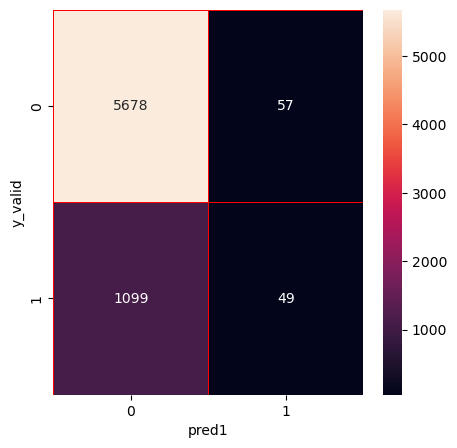

In [77]:
tn,fp,fn,tp = confusion_matrix(y_val,pred2).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred1")
plt.ylabel("y_valid")
plt.show()

In [80]:
k_pred_2 = knn_cv.predict(X_test)
accuracy_score(k_pred_2,y_test)

0.8407192154013803

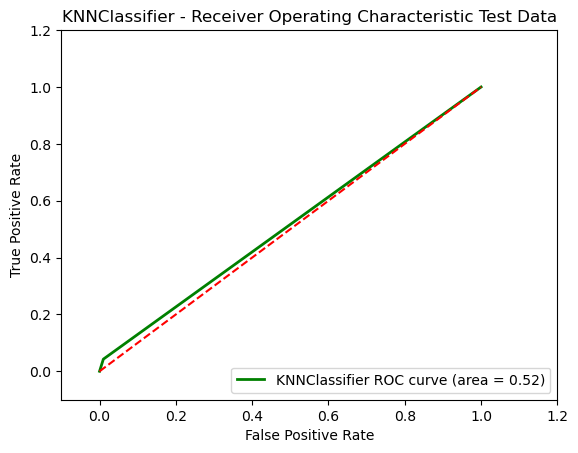

In [79]:
#roc curve
fpr2,tpr2,thres2 = roc_curve(y_val, pred2)   
roc_auc2 = auc(fpr2, tpr2)   
plt.title('KNNClassifier - Receiver Operating Characteristic Test Data') 
plt.plot(fpr2, tpr2, color ='green', lw = 2, label='KNNClassifier ROC curve (area = %0.2f)' % roc_auc2) 
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [82]:
rsearch1_best_params = {'n_estimators': np.arange(10, 2000, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

In [ ]:
rfc1 = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rfc1, param_distributions=rsearch1_best_params, cv=5, verbose=0)
t1 = time.time()
rf_random_grid.fit(X_train,y_train)
pred3 = rf_random_grid.predict(X_val)
t2 = time.time()
ts3  = accuracy_score(y_val, pred3)*100  #test accuracy
trn3 = accuracy_score(y_train, rf_random_grid.predict(X_train))*100  #train accuracy
cmdt = confusion_matrix(y_val, pred3)  
Sen3 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc3 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr3 = 1-Sen3
print('\nRandomForestClassifier model \n\nClassification report for test data:\n\n',classification_report(y_val, pred3))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))

In [ ]:
print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

True Neg:844
False Pos:0
False Neg:0
True Pos:844


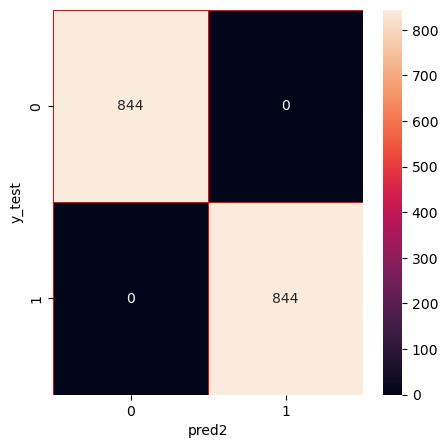

In [79]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred3).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred2")
plt.ylabel("y_test")
plt.show()

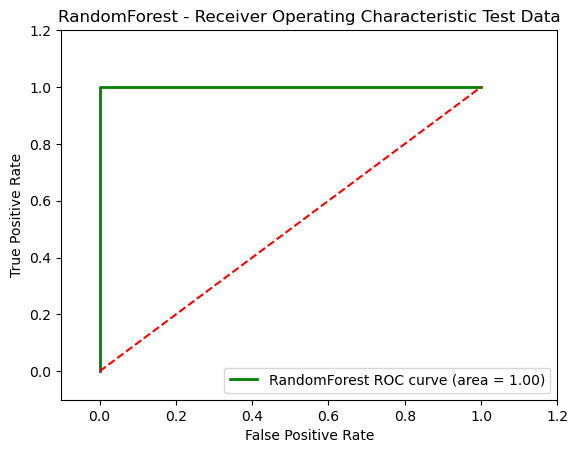

In [80]:
#roc curve
fpr3,tpr3,thres3 = roc_curve(y_valid, pred3) 
roc_auc3 = auc(fpr3, tpr3)
plt.title('RandomForest - Receiver Operating Characteristic Test Data') 
plt.plot(fpr3, tpr3, color ='green', lw = 2, label='RandomForest ROC curve (area = %0.2f)' % roc_auc3)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# XG Boost

In [81]:
import xgboost
from xgboost import XGBClassifier
rsearch1_best_params = {'eval_metric': 'auc',
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 270,
 'reg_alpha': 0.01}

In [82]:
xgbc1 = XGBClassifier(**rsearch1_best_params, random_state=300) 
t1 = time.time()
xgbc1.fit(X_train_tf,y_train)
pred4 = xgbc1.predict(X_valid_tf)
t2 = time.time()
ts4 = accuracy_score(y_valid, pred4)*100  #test accuracy
trn4 = accuracy_score(y_train, xgbc1.predict(X_train_tf))*100  #train accuracy
cmdt = confusion_matrix(y_valid, pred3)
Sen4 = cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])
Spc4 = cmdt[0,0]/(cmdt[0,0]+cmdt[1,0])
fnr4 = 1-Sen4
print('\nXGBoost model \n\nClassification report for test data:\n\n',classification_report(y_valid, pred4))
print('\nConfusion matrix for test data:\n', cmdt)
print('\nSensitivity : ', cmdt[1,1]/(cmdt[1,1]+cmdt[0,1])) 
print('Specificity : ', cmdt[0,0]/(cmdt[0,0]+cmdt[1,0]))
print('\nExecution time for Model: %f seconds' %((t2-t1)))


XGBoost model 

Classification report for test data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       1.00      1.00      1.00       844

    accuracy                           1.00      1688
   macro avg       1.00      1.00      1.00      1688
weighted avg       1.00      1.00      1.00      1688


Confusion matrix for test data:
 [[844   0]
 [  0 844]]

Sensitivity :  1.0
Specificity :  1.0

Execution time for Model: 0.283252 seconds


True Neg:844
False Pos:0
False Neg:0
True Pos:844


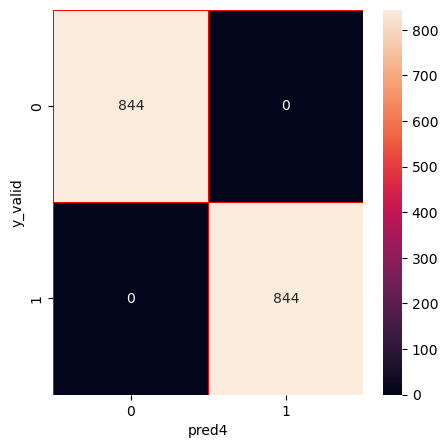

In [83]:
tn,fp,fn,tp = confusion_matrix(y_valid,pred4).ravel()
print(f'True Neg:{tn}')
print(f'False Pos:{fp}')
print(f'False Neg:{fn}')
print(f'True Pos:{tp}') 
#confusion matrix heat map
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("pred4")
plt.ylabel("y_valid")
plt.show()

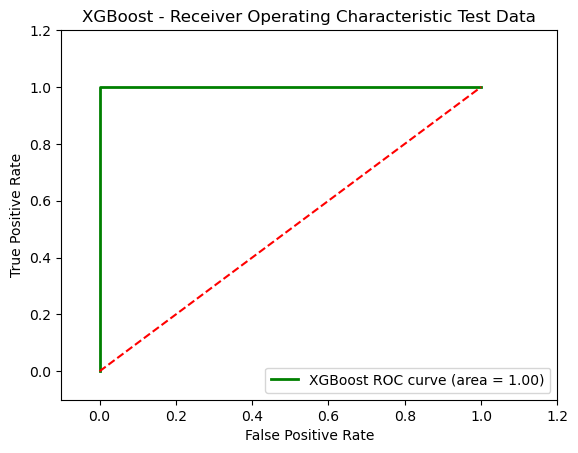

In [84]:
#roc curve
fpr4,tpr4,thres4 = roc_curve(y_valid, pred4) 
roc_auc4 = auc(fpr4, tpr4)
plt.title('XGBoost - Receiver Operating Characteristic Test Data') 
plt.plot(fpr4, tpr4, color ='green', lw = 2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc4)
plt.legend(loc='lower right')    
plt.plot([0,1],[0,1],'r--')      
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])             
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

# Model Selection

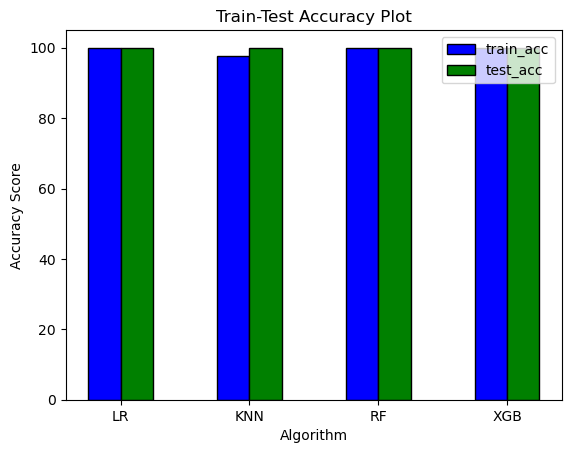

In [86]:
# Bar plots of train and test data accuracies for all models
train_acc = [trn1,trn2,trn3,trn4]
test_acc = [ts1, ts2, ts3, ts4]

n=4
r = np.arange(n)
width = 0.25
plt.bar(r, train_acc, color = 'b',width = width, edgecolor = 'black',label='train_acc')
plt.bar(r + width, test_acc, color = 'g',width = width, edgecolor = 'black',label='test_acc')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Train-Test Accuracy Plot")

# plt.grid(linestyle='--')
plt.xticks(r + width/2,['LR','KNN','RF','XGB'])
plt.legend()

plt.show()